![](https://i1.wp.com/dataaspirant.com/wp-content/uploads/2017/01/irises.png?w=600)

### Neo4j and H2O integration, using Pandas dataframes and py2neo
### Predictions updates using py2neo or bolt

[original source here](https://anaconda.org/koverholt/h2o-kmeans-clustering/notebook)

Dependencies:
* H2O.ai running locally
* Neo4j v3.1.3 running locally
* Apoc plugin for neo4j
* py2neo driver for python
* neo4-driver for python
* pandas, time, string, ipython, math


![](https://cloud.githubusercontent.com/assets/5991751/26788723/0a5be6fe-49c3-11e7-938d-dd79a9149966.png)


In [192]:
import py2neo
from py2neo import Graph

loadiris = '''
WITH "https://raw.githubusercontent.com/graphadvantage/neo4j-h20-template/master/iris.csv" AS url
CALL apoc.load.csv(url,
  {
  header:true,
  mapping:{
    sepal_len:{type:'float'},
    sepal_wid:{type:'float'},
    petal_len:{type:'float'},
    petal_wid:{type:'float'},
    class:{type:'string'}
  }
}) YIELD map
CREATE (i:Iris)
SET i += map, i.uuid = apoc.create.uuid()
'''

# Some of these keyword arguments are unnecessary, as they are the default values.
graph = py2neo.Graph(bolt=True, host='localhost', user='neo4j', password='neo4j')

graph.run(loadiris)

In [193]:
import time
from IPython.display import display, HTML
import pandas as pd
from pandas import DataFrame
import py2neo
from py2neo import Graph

query1 = '''
MATCH (n:Iris) 
RETURN
n.class AS class,
n.petal_len AS petal_len,
n.petal_wid AS petal_wid,
n.sepal_len AS sepal_len,
n.sepal_wid AS sepal_wid,
n.uuid AS uuid
'''

# Some of these keyword arguments are unnecessary, as they are the default values.
graph = py2neo.Graph(bolt=True, host='localhost', user='neo4j', password='neo4j')

df = DataFrame(graph.data(query1))

#display(df)

df.style\
    .bar(subset=['petal_len'], color='#2980b9')\
    .bar(subset=['petal_wid'], color='#e74c3c')\
    .bar(subset=['sepal_len'], color='#27ae60')\
    .bar(subset=['sepal_wid'], color='#f1c40f')\


In [194]:
import seaborn as sns
%matplotlib inline
sns.set()

import h2o

h2o.init()

iris = h2o.H2OFrame(df)

iris.describe()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 day 21 hours 45 mins
H2O cluster version:,3.10.0.9
H2O cluster version age:,7 months and 1 day !!!
H2O cluster name:,H2O_from_python_ecoreefs_rzrfo8
H2O cluster total nodes:,1
H2O cluster free memory:,3.241 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


Parse progress: |█████████████████████████████████████████████████████████| 100%
Rows:150
Cols:6




,class,petal_len,petal_wid,sepal_len,sepal_wid,uuid
type,enum,real,real,real,real,uuid
mins,0.0,1.0,0.1,4.3,2.0,NaN
mean,NaN,3.758666666666667,1.1986666666666668,5.843333333333334,3.0539999999999994,NaN
maxs,2.0,6.9,2.5,7.9,4.4,NaN
sigma,NaN,1.7644204199522624,0.7631607417008414,0.8280661279778637,0.4335943113621737,NaN
zeros,50,0,0,0,0,0
missing,0,0,0,0,0,0
0,Iris-setosa,1.4000000000000001,0.2,5.1000000000000005,3.5,1111EA07-F0CE-415B-B77B-E99B57B3F2EF
1,Iris-setosa,1.4000000000000001,0.2,4.9,3.0,DAD59BDD-5CDB-4E48-9941-76EC0F3AB65A
2,Iris-setosa,1.3,0.2,4.7,3.2,F93B53CE-5B54-431F-BB51-9BD13B530251


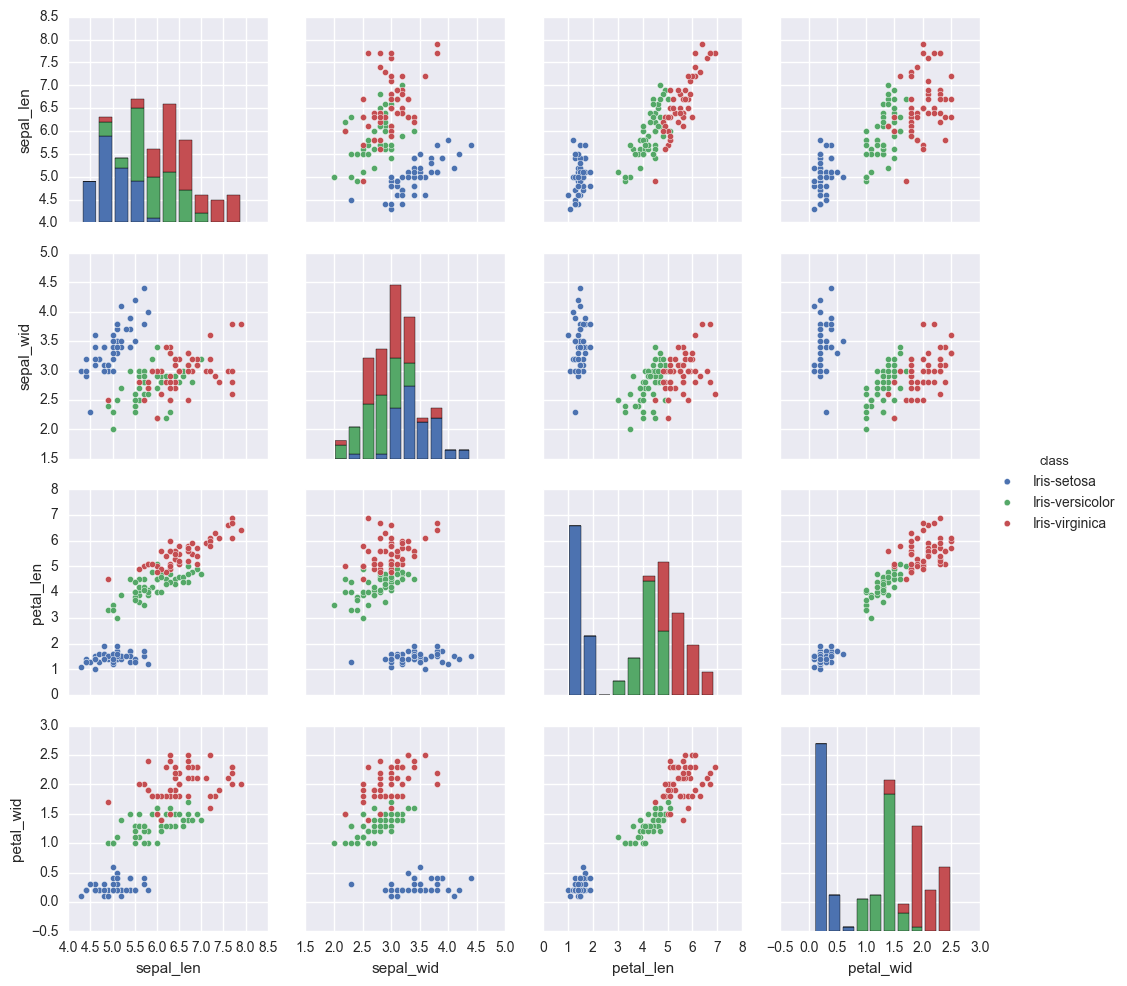

In [195]:
sns.set_context("notebook")
sns.pairplot(iris.as_data_frame(True), vars=["sepal_len", "sepal_wid", "petal_len", "petal_wid"], hue="class");

In [196]:
from h2o.estimators.kmeans import H2OKMeansEstimator

In [197]:
results = [H2OKMeansEstimator(k=clusters, init="Random", seed=2, standardize=True) for clusters in range(2,13)]
for estimator in results:
    estimator.train(x=iris.col_names[0:-1], training_frame = iris)

kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [198]:
import math as math

def diagnostics_from_clusteringmodel(model):
    total_within_sumofsquares = model.tot_withinss()
    number_of_clusters = len(model.centers())
    number_of_dimensions = len(model.centers()[0])
    number_of_rows = sum(model.size())
    
    aic = total_within_sumofsquares + 2 * number_of_dimensions * number_of_clusters
    bic = total_within_sumofsquares + math.log(number_of_rows) * number_of_dimensions * number_of_clusters
    
    return {'Clusters':number_of_clusters,
            'Total Within SS':total_within_sumofsquares, 
            'AIC':aic, 
            'BIC':bic}

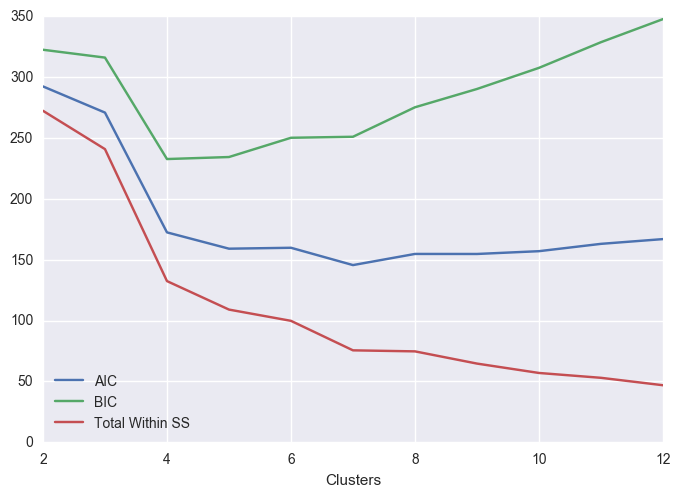

In [199]:
diagnostics = pd.DataFrame( [diagnostics_from_clusteringmodel(model) for model in results])
diagnostics.set_index('Clusters', inplace=True)
diagnostics.plot(kind='line');

In [200]:
clusters = 4
predicted = results[clusters-2].predict(iris)
iris["Predicted"] = predicted["predict"].asfactor()

kmeans prediction progress: |█████████████████████████████████████████████| 100%


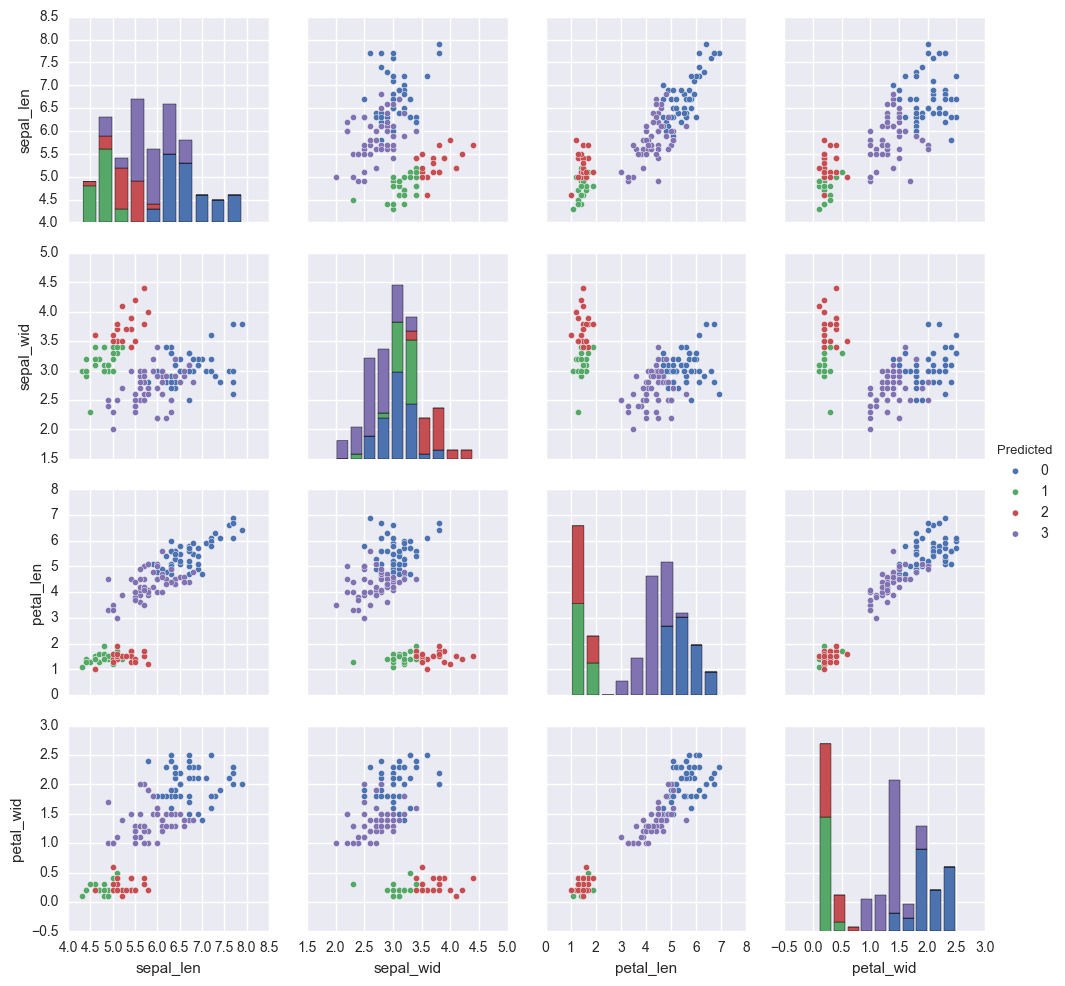

In [201]:
sns.pairplot(iris.as_data_frame(True), vars=["sepal_len", "sepal_wid", "petal_len", "petal_wid"],  hue="Predicted");

Oddly, H2O seems to uppercase the uuid by default --- so we have to apply LOWER(uuid) to update the graph

In [202]:
iris

class,petal_len,petal_wid,sepal_len,sepal_wid,uuid,Predicted
Iris-setosa,1.4,0.2,5.1,3.5,1111EA07-F0CE-415B-B77B-E99B57B3F2EF,2
Iris-setosa,1.4,0.2,4.9,3,DAD59BDD-5CDB-4E48-9941-76EC0F3AB65A,1
Iris-setosa,1.3,0.2,4.7,3.2,F93B53CE-5B54-431F-BB51-9BD13B530251,1
Iris-setosa,1.5,0.2,4.6,3.1,56E7A83F-91E2-4E70-A21D-E62FF0AA9371,1
Iris-setosa,1.4,0.2,5,3.6,5386BCF4-E2E1-4965-A8DD-B2297596CEA0,2
Iris-setosa,1.7,0.4,5.4,3.9,1E185978-840D-4F6C-B6AD-ED96CFFCAF15,2
Iris-setosa,1.4,0.3,4.6,3.4,3666F910-1694-4FF4-9F52-D367ED68DBF2,1
Iris-setosa,1.5,0.2,5,3.4,49683F36-C649-4EDD-A6DC-1FE3E4603287,1
Iris-setosa,1.4,0.2,4.4,2.9,2F2549B5-BF9B-4F12-8F7C-9E29D1972A42,1
Iris-setosa,1.5,0.1,4.9,3.1,440853CF-5293-472F-94E0-A1CF6BC2B631,1


In [203]:
#Py2Neo Driver

import time

from string import Template

scores = iris[5:].as_data_frame()

df = DataFrame(scores)

#scores = df.to_list()

scores = df.to_json(orient = 'values')

#display(scores)

updateiris = Template(' \
WITH ${scores} AS records \
UNWIND records AS r \
WITH LOWER(r[0]) AS uuid, r[1] AS predicted \
MATCH (i:Iris {uuid: uuid}) \
SET i.predicted = predicted \
MERGE (c:Cluster {cluster: predicted}) \
MERGE (i)-[:MEMBER]->(c) \
').substitute(locals())


graph = py2neo.Graph(bolt=True, host='localhost', user='neo4j', password='neo4j')

t0 = time.time()

graph.run(updateiris, scores = scores)

print(round((time.time() - t0)*1000,1), " ms elapsed time")


300.2  ms elapsed time


In [204]:
# Bolt Driver


import time

from string import Template

from neo4j.v1 import GraphDatabase, basic_auth, TRUST_ON_FIRST_USE, CypherError

driver = GraphDatabase.driver("bolt://localhost",
                              auth=basic_auth("neo4j", "neo4j"),
                              encrypted=False,
                              trust=TRUST_ON_FIRST_USE)

result = iris[5:].as_data_frame()

scores = DataFrame(result).to_json(orient = 'values')

#display(scores)

updateiris = Template(' \
WITH ${scores} AS records \
UNWIND records AS r \
WITH LOWER(r[0]) AS uuid, r[1] AS predicted \
MATCH (i:Iris {uuid: uuid}) \
SET i.predicted = predicted \
MERGE (c:Cluster {cluster: predicted}) \
MERGE (i)-[:MEMBER]->(c) \
').substitute(locals())


session = driver.session()
t0 = time.time()
print("processing...")
result = session.run(updateiris, {"scores":scores})

for record in result:
    print(record)

summary = result.consume()
counters = summary.counters
print(summary)
print(counters)
print(round((time.time() - t0)*1000,1), " ms elapsed time")
print('-----------------')
session.close()



processing...
{'properties_set': 150}
215.5  ms elapsed time
-----------------
